### materials

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
rng = np.random.default_rng(42)

def generate_students(n=200, seed=42):
 	rng = np.random.default_rng(seed)
 	hours_studied = rng.normal(5, 2, n).clip(1, 10)
 	marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
 	gender = rng.choice(['Male', 'Female'], n)
 	subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
 	study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
 	attempts = rng.integers(1, 4, n)
 	return pd.DataFrame({
     	'hours_studied': hours_studied.round(2),
     	'marks': marks.round(2),
     	'gender': gender,
     	'subject': subject,
     	'study_method': study_method,
     	'attempts': attempts
 	})

def generate_daily_sales(n=60, seed=42):
 	rng = np.random.default_rng(seed)
 	base = pd.date_range(start='2024-01-01', periods=n, freq='D')
 	trend = np.linspace(50, 80, n)
 	season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
 	noise = rng.normal(0, 3, n)
 	sales = (trend + season + noise).round(2)
 	return pd.DataFrame({'date': base, 'sales': sales})

# Example usage
students = generate_students(220)
sales = generate_daily_sales(90)
students.to_csv('students.csv', index=False)
sales.to_csv('sales.csv', index=False)

print(students.head())
print(sales.head())


   hours_studied  marks  gender  subject study_method  attempts
0           5.61  54.04    Male  English         Solo         2
1           2.92  30.00  Female  Science         Solo         2
2           6.50  70.46  Female  History        Group         3
3           6.88  52.76  Female  English        Group         3
4           1.10  30.00  Female  History         Solo         1
        date  sales
0 2024-01-01  50.91
1 2024-01-02  48.06
2 2024-01-03  54.61
3 2024-01-04  56.33
4 2024-01-05  48.78


## 1. Using sales, draw a lineplot of date vs sales.


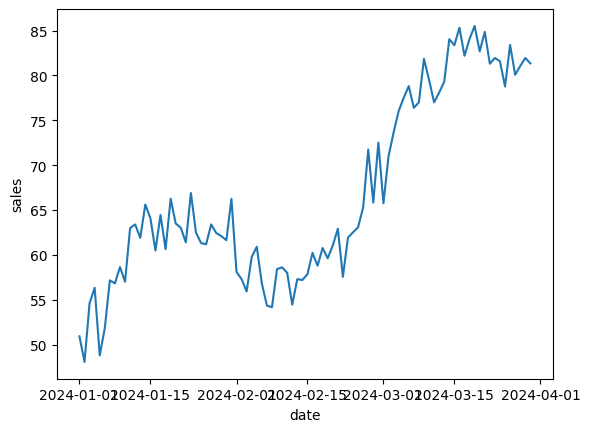

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.lineplot(data=sales, x='date', y='sales',errorbar=None)
plt.show()

# 2.From students, plot hours_studied vs marks and color by gender.


In [10]:
fig = px.histogram(students, x='marks', color='gender', barmode='group')
fig.show()

# 3.Create a grid of scatterplots (hours_studied vs marks) faceted by subject.


In [12]:
skt = px.scatter(students, x='hours_studied', y='marks', color='gender')
skt.show()

In [15]:
skt = px.scatter(students, x='hours_studied', y='marks', color='gender',facet_col='subject')
skt.show()

# 4.Plot a histogram of marks with a KDE overlay.


<Axes: xlabel='marks', ylabel='Density'>

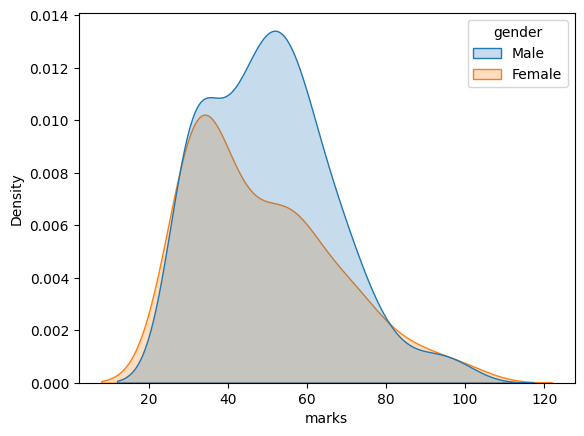

In [20]:

sns.kdeplot(data = students, x ='marks',hue='gender',fill=True)

<Axes: xlabel='marks', ylabel='Density'>

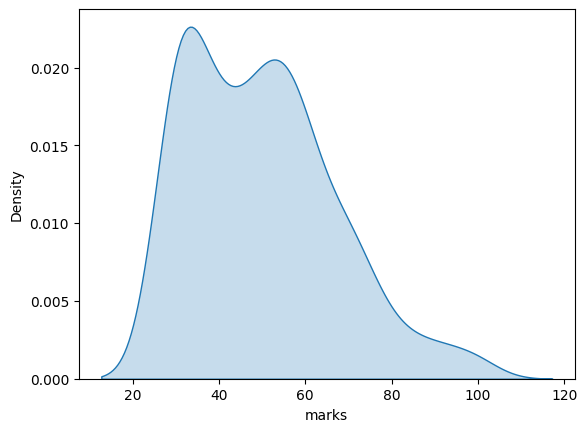

In [21]:
sns.kdeplot(data=students, x='marks', fill=True)

<Axes: xlabel='marks', ylabel='Count'>

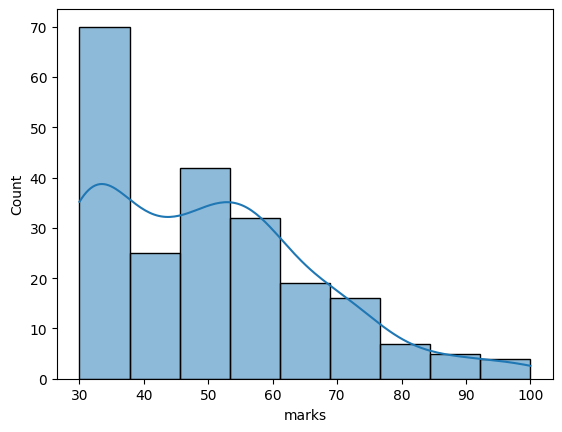

In [22]:
sns.histplot(data=students, x='marks', kde=True)

# 5.Show the KDE curve for hours_studied.

<Axes: xlabel='hours_studied', ylabel='Count'>

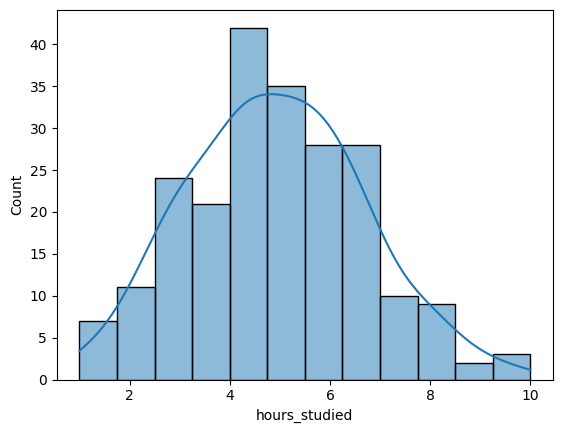

In [24]:
sns.histplot(data=students, x='hours_studied', kde=True)

# 6.Display the count of records per subject.


In [25]:
display(students['subject'].value_counts())

,count
subject,
English,63
History,54
Math,54
Science,49


# 7.Draw a regression line for hours_studied and marks.

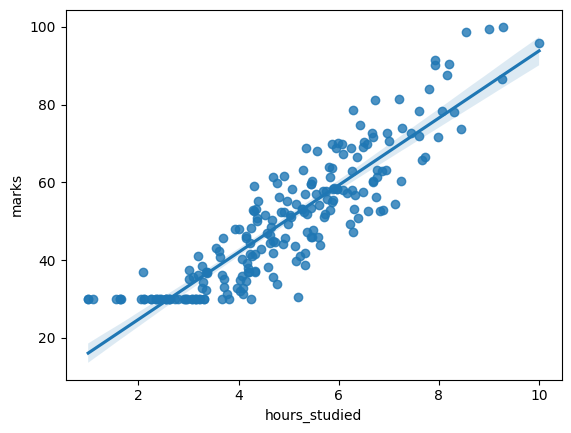

In [26]:
sns.regplot(data=students, x='hours_studied', y='marks')
plt.show()

# 8.Create a pairplot and a jointplot for students' dataset.

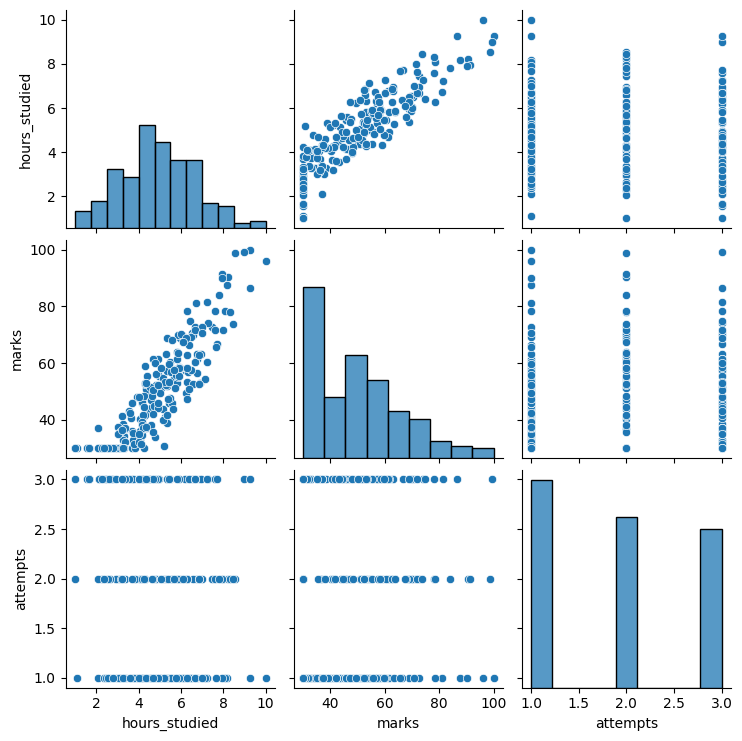

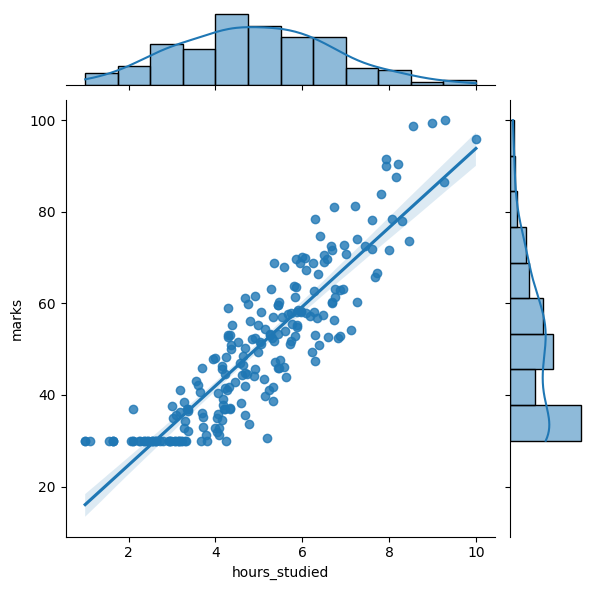

In [27]:
sns.pairplot(students)
plt.show()

sns.jointplot(data=students, x='hours_studied', y='marks', kind='reg')
plt.show()

# 9.Make a scatter plot of hours_studied vs marks using Plotly, colored by gender.

In [28]:
fig = px.scatter(students, x='hours_studied', y='marks', color='gender')
fig.show()

# 10.Draw a line chart of sales over date and a histogram of marks using Plotly.

In [29]:
fig_line = px.line(sales, x='date', y='sales')
fig_line.show()

fig_hist = px.histogram(students, x='marks')
fig_hist.show()